In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt 
 

In [122]:
def Cavity_Domain(x0,x1,y0,y1,dx,dy):
    X = np.arange(x0,x1,dx)
    Y = np.arange(y0,y1,dy)
    xx,yy = np.meshgrid(X,Y)
    u = np.zeros((X.size+2,Y.size+2))
    v = np.zeros((X.size+2,Y.size+2))
    p = np.zeros((X.size+2,Y.size+2))
    return xx,yy,u,v,p

def intial(u,v,p,xx,yy,level=25):
    
    plt.figure()
    plt.contourf(xx,yy,u(xx,yy),cmap='jet',levels=level)
    plt.title('Distribution of U ')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()

    plt.figure()
    plt.contourf(xx,yy,v(xx,yy),cmap='jet',levels=level)
    plt.title('Distribution of V ')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()

    
    plt.figure()
    plt.contourf(xx,yy,p(xx,yy),cmap='jet',levels=level)
    plt.colorbar()
    plt.title('Distribution of P ')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    plt.figure()
    plt.streamplot(xx,yy,u(xx,yy),v(xx,yy),color='black')
    plt.contourf(xx,yy,p(xx,yy),cmap='jet',levels=level)
    plt.colorbar()
    plt.title('Distribution')
    plt.xlabel('X')
    plt.ylabel('Y')
    

In [123]:
p0 = 2
u0 = 2
v0 = 2

P = lambda x,y : p0*np.cos(np.pi*x) * np.cos(np.pi*y)
U = lambda x,y : u0*np.sin(np.pi*x) * np.sin(2*np.pi*y)
V = lambda x,y : v0*np.sin(2*np.pi*x) * np.sin(np.pi*y)

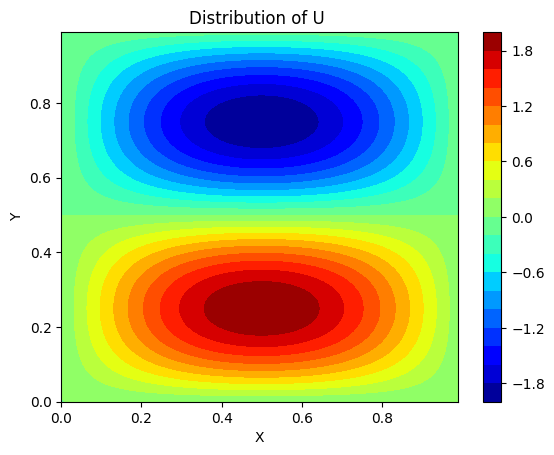

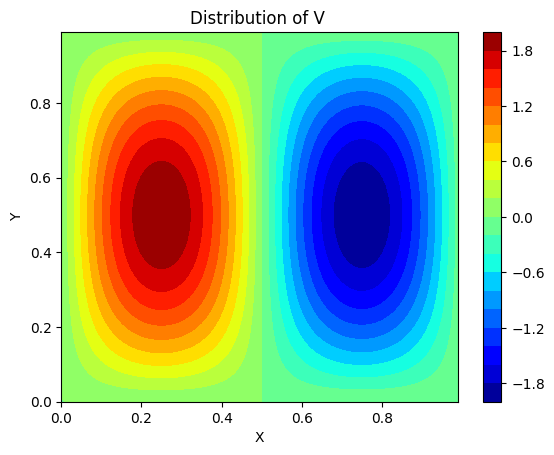

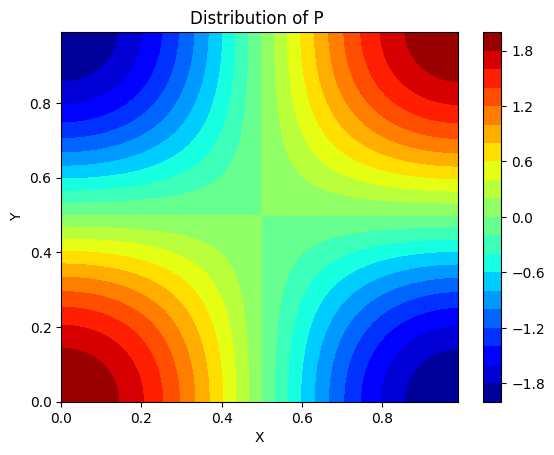

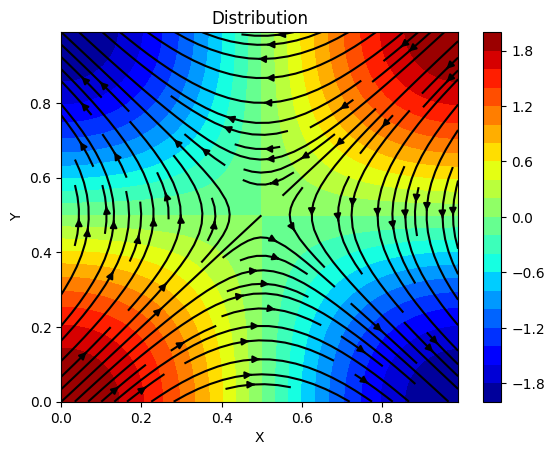

In [124]:
xx,yy,u,v,p = Cavity_Domain(0,1,0,1,0.01,0.01)
intial(U,V,P,xx,yy)
P_I = P(xx,yy)
U_I = U(xx,yy)
V_I = V(xx,yy)

In [125]:
beta = 1
rho = 1
Uw = 1
Lr = 1
mu = 1 

Re = (rho*Uw*Lr)/(mu)

In [126]:
Re=1

In [127]:
def solution_vector(u):
    s = np.ndarray.tolist(np.copy(u))
    for i in range(0,len(s)):
        for j in range(0,len(s)):
            s[i][j]  = [0,0,0]
    return s 

s = solution_vector(u)
f = solution_vector(u)
g = solution_vector(u)

In [128]:
u[1:-1,1:-1] = U_I
v[1:-1,1:-1] = V_I
p[1:-1,1:-1] = P_I

In [129]:
for i in range(np.shape(s)[0]):
    for j in range(np.shape(s)[1]):
        s[i][j][0] = p[i,j]
        s[i][j][1] = u[i,j]
        s[i][j][2] = v[i,j]


In [130]:
#Boundry condition

#Up
for j in range(np.shape(s[0])[0]):
    s[0][j][1] = 2*Uw - s[1][j][1]
    s[0][j][2] = -s[1][j][2]


#Down
for j in range(np.shape(s[0])[0]):
    s[-1][j][0] = p[-1,j]
    s[-1][j][1] = -s[-2][j][1]
    s[-1][j][2] = -s[-2][j][2]


#Left
for i in range(np.shape(s)[1]):
    s[i][0][1] = -s[i][1][1]
    s[i][0][2] = -s[i][1][2]


#wright
for i in range(np.shape(s)[1]):
    s[i][-1][1] = -s[-2][1][1]
    s[i][-1][2] = -s[-2][1][2]

In [131]:
dx = 0.01
dy = 0.01
dt = 0.00001
beta=0.0001

for iter in range(1000):
    # Up
    for j in range(np.shape(s[0])[0]):
        s[0][j][1] = 2*10 - s[1][j][1]
        s[0][j][2] = -s[1][j][2]

    # Down
    for j in range(np.shape(s[0])[0]):
        s[-1][j][1] = -s[-2][j][1]
        s[-1][j][2] = -s[-2][j][2]

    # Left
    for i in range(np.shape(s)[1]):
        s[i][0][1] = -s[i][1][1]
        s[i][0][2] = -s[i][1][2]

    # Right
    for i in range(np.shape(s)[1]):
        s[i][-1][1] = -s[i][-2][1]
        s[i][-1][2] = -s[i][-2][2]

    s_new = s.copy()
    for i in range(1, np.shape(s)[0] - 1):
        for j in range(1, np.shape(s)[1] - 1):
            # i,j
            p_t_ij = s[i][j][0]
            u_t_ij = s[i][j][1]
            v_t_ij = s[i][j][2]
            # i+1,j
            p_t_e = s[i][j + 1][0]
            u_t_e = s[i][j + 1][1]
            v_t_e = s[i][j + 1][2]
            # i-1,j
            p_t_w = s[i][j - 1][0]
            u_t_w = s[i][j - 1][1]
            v_t_w = s[i][j - 1][2]
            # i,j+1
            p_t_n = s[i + 1][j][0]
            u_t_n = s[i + 1][j][1]
            v_t_n = s[i + 1][j][2]
            # i,j-1
            p_t_s = s[i - 1][j][0]
            u_t_s = s[i - 1][j][1]
            v_t_s = s[i - 1][j][2]

            Fe = [[(u_t_e + u_t_ij) / (2 * beta)],
                  [((u_t_e + u_t_ij) / 2) ** 2 + ((p_t_ij + p_t_e) / 2) - ((1 / Re) * ((u_t_e - u_t_ij) / dx))],
                  [((u_t_e + u_t_ij) / 2) * ((v_t_e + v_t_ij) / 2) - (1 / Re) * ((v_t_e - v_t_ij) / dx)]]

            Fw = [[(u_t_w + u_t_ij) / (2 * beta)],
                  [((u_t_w + u_t_ij) / 2) ** 2 + ((p_t_ij + p_t_w) / 2) - ((1 / Re) * ((u_t_ij - u_t_w) / dx))],
                  [((u_t_w + u_t_ij) / 2) * ((v_t_w + v_t_ij) / 2) - (1 / Re) * ((v_t_ij - v_t_w) / dx)]]

            Gn = [[(v_t_n + v_t_ij) / (2 * beta)],
                  [((u_t_n + u_t_ij) / 2) * ((v_t_n + v_t_ij) / 2) - (1 / Re) * ((u_t_n - u_t_ij) / dy)],
                  [((v_t_n + v_t_ij) / 2) ** 2 + ((p_t_n + p_t_ij) / 2) - (1 / Re) * ((v_t_n - v_t_ij) / dy)]]

            Gs = [[(v_t_s + v_t_ij) / (2 * beta)],
                  [((u_t_s + u_t_ij) / 2) * ((v_t_s + v_t_ij) / 2) - (1 / Re) * ((u_t_ij - u_t_s) / dy)],
                  [((v_t_s + v_t_ij) / 2) ** 2 + ((p_t_s + p_t_ij) / 2) - (1 / Re) * ((v_t_ij - v_t_s) / dy)]]

            D_F = (np.array(Fe) - np.array(Fw)) / dx
            D_G = (np.array(Gn) - np.array(Gs)) / dy
            s_new[i][j] = np.ndarray.tolist((dt * (-np.array(D_F) - np.array(D_G))).reshape(1, 3) + (np.array(s[i][j])))[0]
    if iter % 50 == 0:
        print(f'----------Iter {iter}----------')
    s = s_new


----------Iter 0----------
----------Iter 50----------
----------Iter 100----------
----------Iter 150----------
----------Iter 200----------
----------Iter 250----------
----------Iter 300----------
----------Iter 350----------
----------Iter 400----------
----------Iter 450----------
----------Iter 500----------
----------Iter 550----------
----------Iter 600----------
----------Iter 650----------
----------Iter 700----------
----------Iter 750----------
----------Iter 800----------
----------Iter 850----------
----------Iter 900----------
----------Iter 950----------


In [133]:
for i in range(np.shape(s)[0]):
    for j in range(np.shape(s)[1]):
        p[i,j] = s[i][j][0] 
        u[i,j] = s[i][j][1]
        v[i,j] = s[i][j][2]

Text(0, 0.5, 'Y')

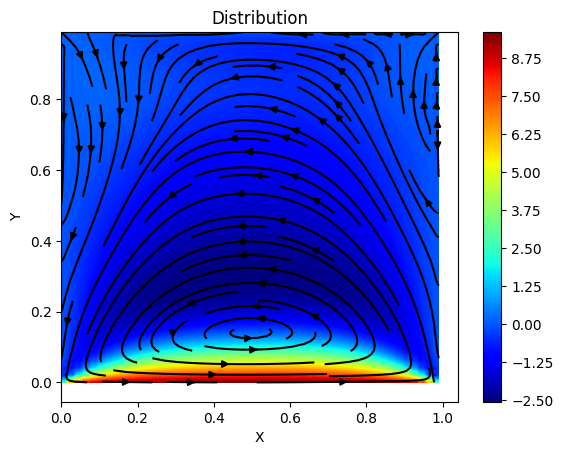

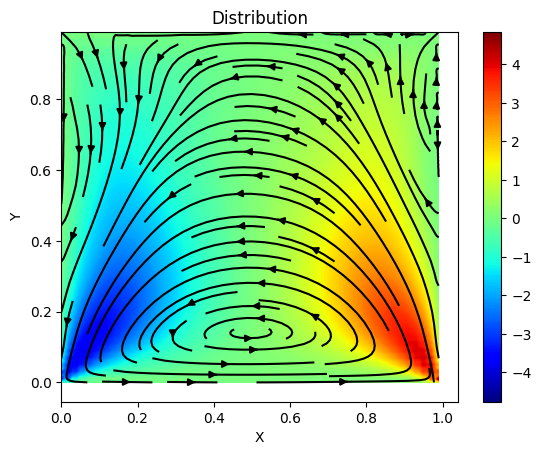

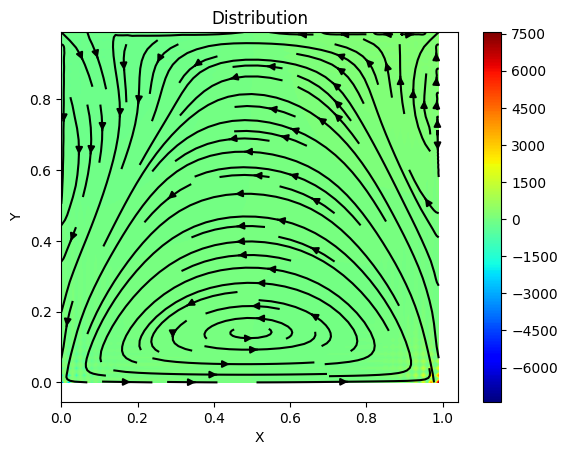

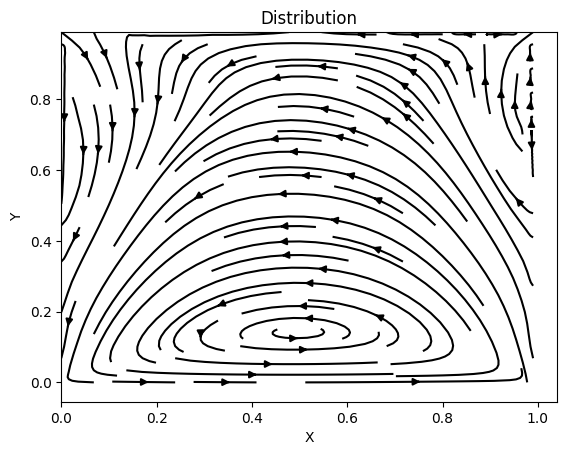

In [134]:
plt.figure()
plt.streamplot(xx,yy,u[1:-1,1:-1],v[1:-1,1:-1],color='black')
plt.contourf(xx,yy,u[1:-1,1:-1],cmap='jet',levels=250)
plt.colorbar()
plt.title('Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.figure()
plt.streamplot(xx,yy,u[1:-1,1:-1],v[1:-1,1:-1],color='black')
plt.contourf(xx,yy,v[1:-1,1:-1],cmap='jet',levels=250)
plt.colorbar()
plt.title('Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.figure()
plt.streamplot(xx,yy,u[1:-1,1:-1],v[1:-1,1:-1],color='black')
plt.contourf(xx,yy,p[1:-1,1:-1],cmap='jet',levels=250)
plt.colorbar()
plt.title('Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.figure()
plt.streamplot(xx,yy,u[1:-1,1:-1],v[1:-1,1:-1],color='black')
plt.title('Distribution')
plt.xlabel('X')
plt.ylabel('Y')

